In [1]:
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt



/opt/miniforge3/envs/scfoundation/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
fname = '/home/jupyter/mnt/__output_clean/brca_full/cell_type/gf-6L-30M-i2048_continue/data.h5ad'
adata_v1_continue =ad.read_h5ad(fname)

In [3]:
adata_v1_continue

AnnData object with n_obs × n_vars = 41101 × 256
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_id', 'donor_id', 'timepoint', 'outcome', 'Cancer_type', 'cell_types', 'cohort', 'pre_post', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'sample_id_pre_post_outcome', 'enough_cells', 'Study_name', 'Primary_or_met', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes_by_counts', 'total_counts', 'n_genes', 'label', 'batch', 'n_counts', 'adata_order'
    obsm: 'X_geneformer'

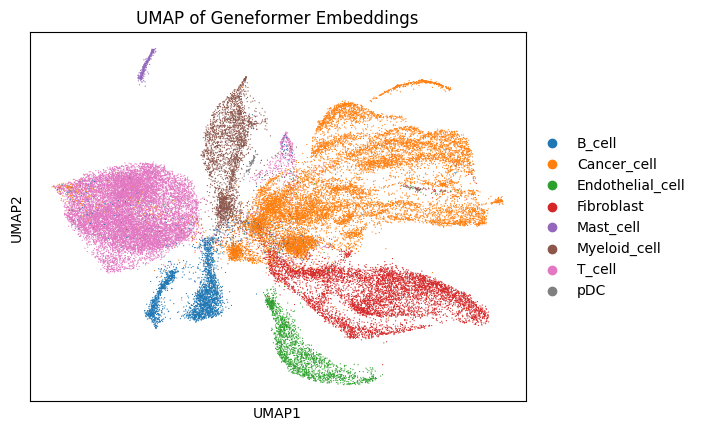

In [5]:
adata = adata_v1_continue
sc.pp.neighbors(adata, use_rep='X_geneformer')  # use_rep tells scanpy to use obsm['X_geneformer']
sc.tl.umap(adata)
sc.pl.umap(adata, color='label', title='UMAP of Geneformer Embeddings', show=True)

In [4]:
fname = '/home/jupyter/mnt/__output_clean/brca_full/cell_type/gf-6L-30M-i2048/data.h5ad'
adata_v1 =ad.read_h5ad(fname)
adata_v1

AnnData object with n_obs × n_vars = 41101 × 256
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_id', 'donor_id', 'timepoint', 'outcome', 'Cancer_type', 'cell_types', 'cohort', 'pre_post', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'sample_id_pre_post_outcome', 'enough_cells', 'Study_name', 'Primary_or_met', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes_by_counts', 'total_counts', 'n_genes', 'label', 'batch', 'n_counts', 'adata_order'
    obsm: 'X_geneformer'

/opt/miniforge3/envs/scfoundation/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


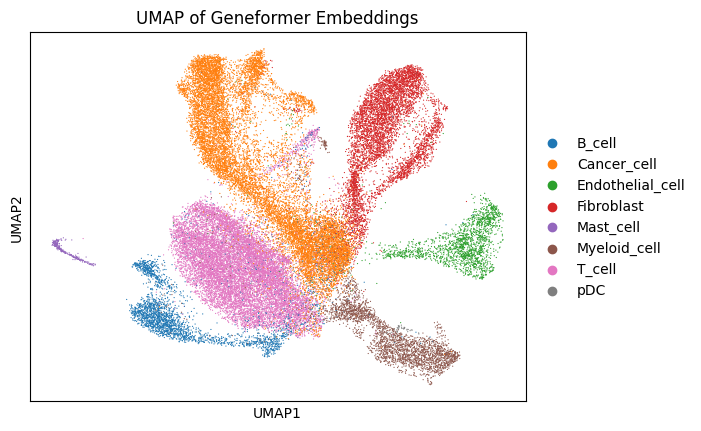

In [5]:
adata = adata_v1
sc.pp.neighbors(adata, use_rep='X_geneformer')  # use_rep tells scanpy to use obsm['X_geneformer']
sc.tl.umap(adata)
sc.pl.umap(adata, color='label', title='UMAP of Geneformer Embeddings', show=True)

In [7]:
fname = '/home/jupyter/mnt/__output_clean/brca_full/cell_type/scvi_100/data.h5ad'
adata_scvi =ad.read_h5ad(fname)

In [8]:
adata_scvi

AnnData object with n_obs × n_vars = 41101 × 100
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_id', 'donor_id', 'timepoint', 'outcome', 'Cancer_type', 'cell_types', 'cohort', 'pre_post', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'sample_id_pre_post_outcome', 'enough_cells', 'Study_name', 'Primary_or_met', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes_by_counts', 'total_counts', 'n_genes', 'label', 'batch', '_scvi_batch', '_scvi_labels'
    obsm: 'X_scVI'

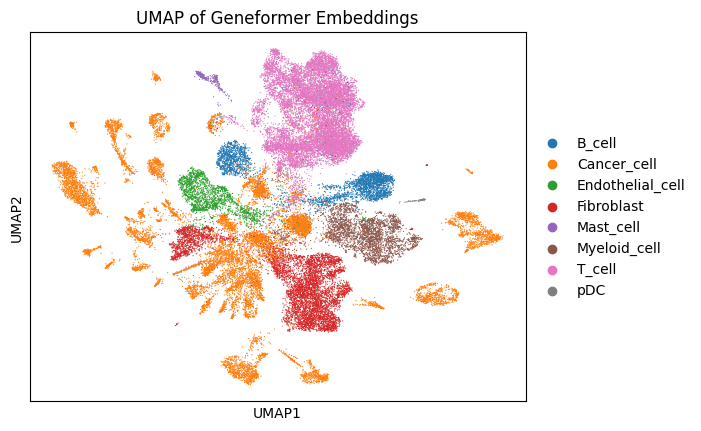

In [9]:
adata = adata_scvi
sc.pp.neighbors(adata, use_rep='X_scVI')  # use_rep tells scanpy to use obsm['X_geneformer']
sc.tl.umap(adata)
sc.pl.umap(adata, color='label', title='UMAP of Geneformer Embeddings', show=True)

NameError: name 'titles' is not defined

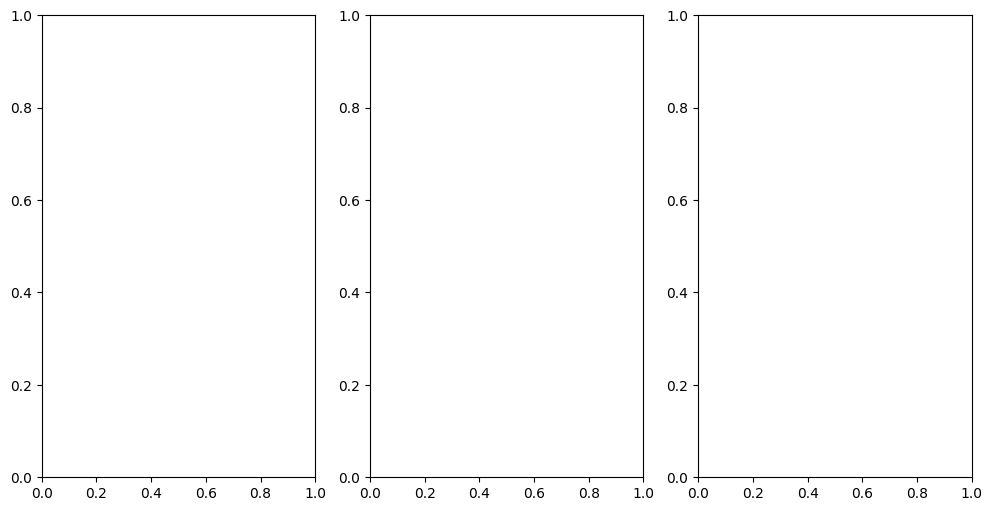

In [10]:
# Compute t-SNE for both datasets
datasets = [adata_scvi, adata_v1, adata_v1_continue]

use_rep = ['X_scVI', 'X_geneformer', 'X_geneformer'] 
for i, ad in enumerate(datasets):
    sc.pp.neighbors(ad,n_neighbors=25, use_rep=use_rep[i])
    sc.tl.umap(ad)

# Create the side-by-side plot
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for ax, ad, title in zip(axes, datasets, titles):
    sc.pl.umap(ad, color='label', ax=ax, show=False, title=title, frameon=False)

# Hide individual legends from scanpy plots
for ax in axes:
    ax.get_legend().remove()  # Remove default scanpy legend
    ax.spines[:].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Create a single, shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(set(labels)), frameon=False)

# Final layout adjustments
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leaves space at bottom for the legend
plt.savefig('umap.png', dpi=100)
plt.show()

In [ ]:
# Create the side-by-side plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
titles = ['scVI', 'GF-V1 [Zero-Shot]', 'GF-V1 [Continual Training]']
for ax, ad, title in zip(axes, datasets, titles):
    sc.pl.umap(ad, color='label', ax=ax, show=False, title=title, frameon=False)

# Hide individual legends from scanpy plots
for ax in axes:
    ax.get_legend().remove()  # Remove default scanpy legend
    ax.spines[:].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Create a single, shared legend

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(set(labels)), frameon=False, fontsize=11)

# Final layout adjustments
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leaves space at bottom for the legend
# plt.subplots_adjust(right=0.9)
plt.savefig('FIG2_C_umap.png', dpi=100)
plt.show()